# **HackLive Stream 1**

## Panelists:

Nikhil Kumar Mishra
- Data Scientist at Analytics Vidhya
- Top 3 in 25+ Hackathons

Ankit Choudhary
- Sr Data Scientist at Analytics Vidhya
- Leading Hackathons Category at Analytics Vidhya

#**Initial Steps**

1. Go to Datahack website at
https://datahack.analyticsvidhya.com/contest/hacklive-guided-community-hackathon/#

2. Download the Dataset.

3. Upload the files as a zip in google colab

In [ ]:
from google.colab import files
files.upload()


Saving hacklive2_dataset_complete.zip to hacklive2_dataset_complete.zip


KeyboardInterrupt: ignored

In [ ]:
!unzip -q hacklive2_dataset_complete.zip

In [ ]:
!pip install -q --upgrade seaborn

**Can you predict the Number of Likes a Youtube Video will get ?**

As YouTube becomes one of the most popular video-sharing platforms, YouTuber is developed as a new type of career in recent decades. YouTubers earn money through advertising revenue from YouTube videos, sponsorships from companies, merchandise sales, and donations from their fans. In order to maintain a stable income, the popularity of videos become the top priority for YouTubers. Meanwhile, some of our friends are YouTubers or channel owners in other video-sharing platforms. This raises our interest in predicting the performance of the video. If creators can have a preliminary prediction and understanding on their videos’ performance, they may adjust their video to gain the most attention from the public.

You have been provided details on videos along with some features as well. Can you accurately predict the number of likes for each video using the set of input variables?

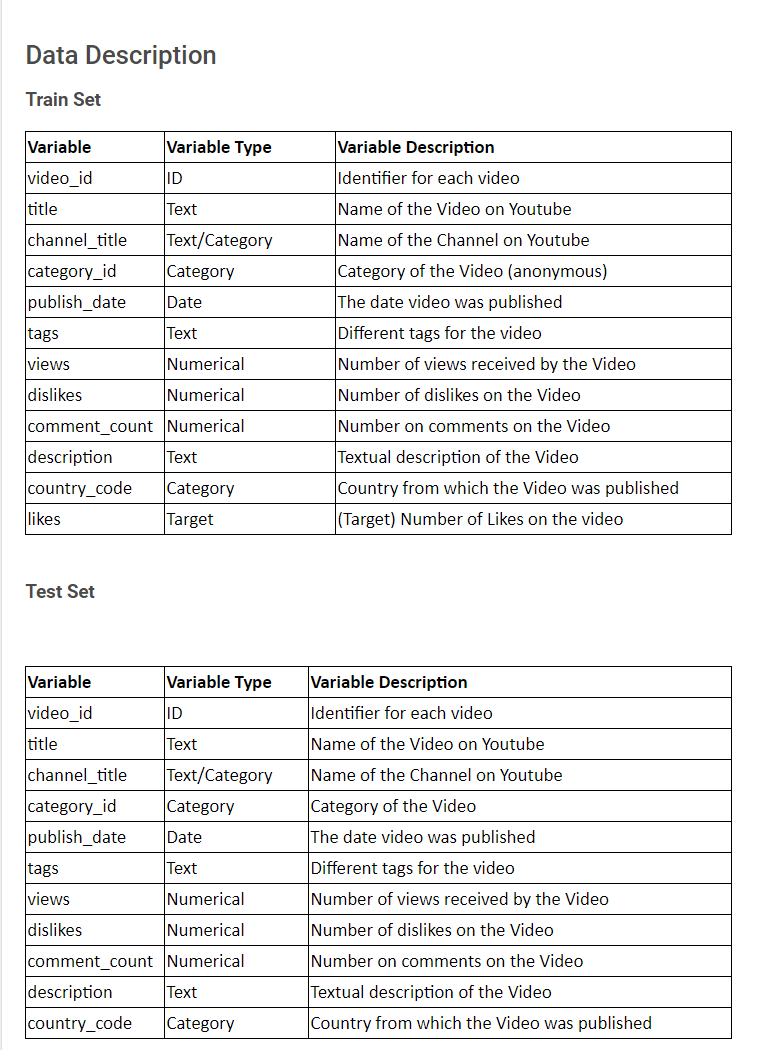

#### **Hypothesis Generation**
Simply put, a hypothesis is a possible view or assertion of an analyst about the problem he or she is working upon. It may be true or may not be true.

* **Do videos with more views get more likes** ?
* **Do videos with more comments get more likes ?**
* **Do with videos with more dislikes get less likes ?**
* **Do longer videos get more likes than shorter videos ?**
* **Do descriptive videos get more number of likes ?**
* **Does a channel affect the number of likes?**
* **Does the country of origin affect the number of likes ?**
* **Do people post more videos on weekends than weekdays ?**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')

import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

# **EDA**

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.  

We have been provided three files. A description for what each of these files contain is given below:


1.     **SampleSubmission.csv**: This gives us a required format for submitting our solutions to the AV solution checker.
2.     **Train.csv**: We will use this file for training our model. It contains variables or features that we will input to our model, and the *target variable* that we want to predict.
3.     **Test.csv**: This will contain all variables in the training dataset except the *target variable*. We will use our trained model to predict the target for this dataset. 


Now lets go on to read and have a look at each of the files.

In [ ]:
ss = pd.read_csv('sample_submission_cxCGjdN.csv')
train = pd.read_csv('train_npQPNh9.csv')
test = pd.read_csv('test_GQu1zkM.csv')

**Sample Submission**

In [ ]:
ss.head(10)

video_id  likes
0     87185      0
1      9431      0
2     40599      0
3       494      0
4     73942      0
5      6918      0
6     28520      0
7     37462      0
8     37920      0
9     41158      0

Our sample submission file contains two columns: 'video_id' and 'likes'. We will use the same format to submit to AV. We don't need the ss for now, we will get back to it once we have completed our modelling and predicting phase.

Lets go and explore our training and test datasets. We will do the following steps:

1. Brief Look at the Dataset
2. See the dataset shape.
3. Target Distribution.
4. See the variables datatypes.
5. See the number of missing/null values.
6. See the number of unique values in each variable. 


### **1. Brief look at the dataset**.

In [ ]:
train.head(3)
test.head(3)

video_id  ...   likes
0     53364  ...  2351.0
1     51040  ...  3264.0
2      1856  ...   580.0

[3 rows x 12 columns]

video_id  ... country_code
0     87185  ...           IN
1      9431  ...           IN
2     40599  ...           CA

[3 rows x 11 columns]

In [ ]:
ID_COL, TARGET_COL = 'video_id', 'likes'

### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')

features = [c for c in train.columns if c not in [ID_COL, TARGET_COL]]
print(f'\nThe dataset contains {len(features)} features')


Train contains 26061 samples and 12 variables

Test contains 11170 samples and 11 variables

The dataset contains 10 features


### **3.Target Distribution**

This is a regression problem. Let's look the at the 'likes' distribution.

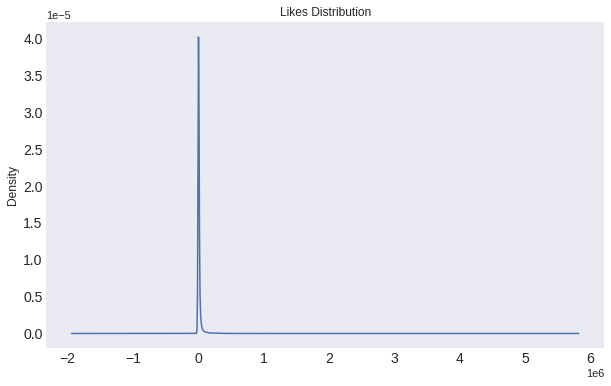

In [ ]:
_ = train[TARGET_COL].plot(kind = 'density', title = 'Likes Distribution', fontsize=14, figsize=(10, 6))

**Question**

***Highly Right Skewed Data.***
<br>
What can we do to change this distribution and make it more normal ?

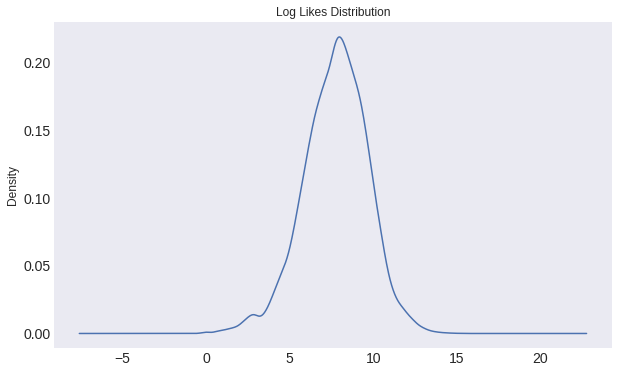

In [ ]:
_ = pd.Series(np.log1p(train[TARGET_COL])).plot(kind = 'density', title = 'Log Likes Distribution', fontsize=14, figsize=(10, 6))

Let's the see the same for boxplot.

1. Without log-transformation.
2. With log-transformation.

**Original Target**

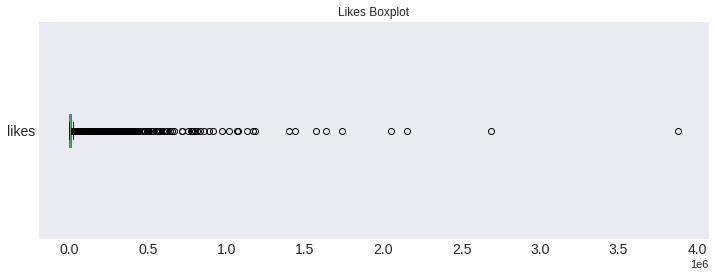

In [ ]:
_ = train[TARGET_COL].plot(kind = 'box', vert=False, figsize=(12, 4), title = 'Likes Boxplot', fontsize=14)

**Log Transformed Target**

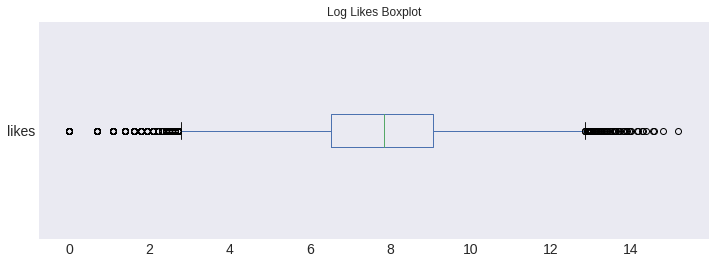

In [ ]:
_ = pd.Series(np.log1p(train[TARGET_COL])).plot(kind = 'box',
                                                vert=False,
                                                figsize=(12, 4),
                                                title = 'Log Likes Boxplot',
                                                fontsize=14)

###**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.



In [ ]:
train.head(1)

video_id  ...   likes
0     53364  ...  2351.0

[1 rows x 12 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


Looks like we have a mixture of datatypes, a lot of these variables are object datatypes. Object datatypes are used to store strings along with other non-numeric data. This is obvious since we encountered a lot of strings when we had a look at the dataset.

Machine Learning Models understand only numbers so we will have to later convert these strings to numbers

### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

likes            0.0
country_code     0.0
description      0.0
comment_count    0.0
dislikes         0.0
views            0.0
tags             0.0
publish_date     0.0
category_id      0.0
channel_title    0.0
title            0.0
video_id         0.0
dtype: float64

### **6. Unique values in each variable**

In [ ]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

The numerical features 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact', 'num_contacts_prev_campaign' contain a lot of unique values which is quite obvious.

Similarly 'day_of_month' contains 31 unique values for each of 31 possible days in a month. Month from January to December contains '12' unique values.

## **Analyzing Each Variable & their relationships**

There are 4 types of features that we have:

1. Numerical
2. Categorical
3. Textual
4. DateTime


Also our target is Continuous

For each feature type we will be perform two types of analysis:

1. Univariate: Analyze 1 feature at a time

2. Bivariate: Analyze the relationship of that feature with target variable, i.e. 'likes'




In [ ]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

### **Numerical Variables**

In [ ]:
num_cols = ['views', 'dislikes', 'comment_count']

#### **Univariate Analyis**

##### **Boxplots**

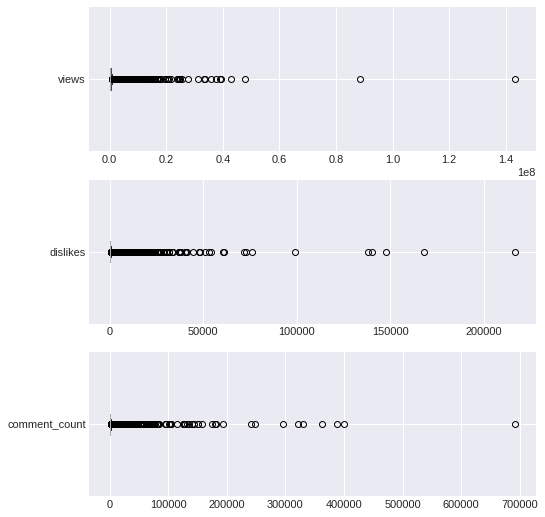

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

##### **Density Plots**

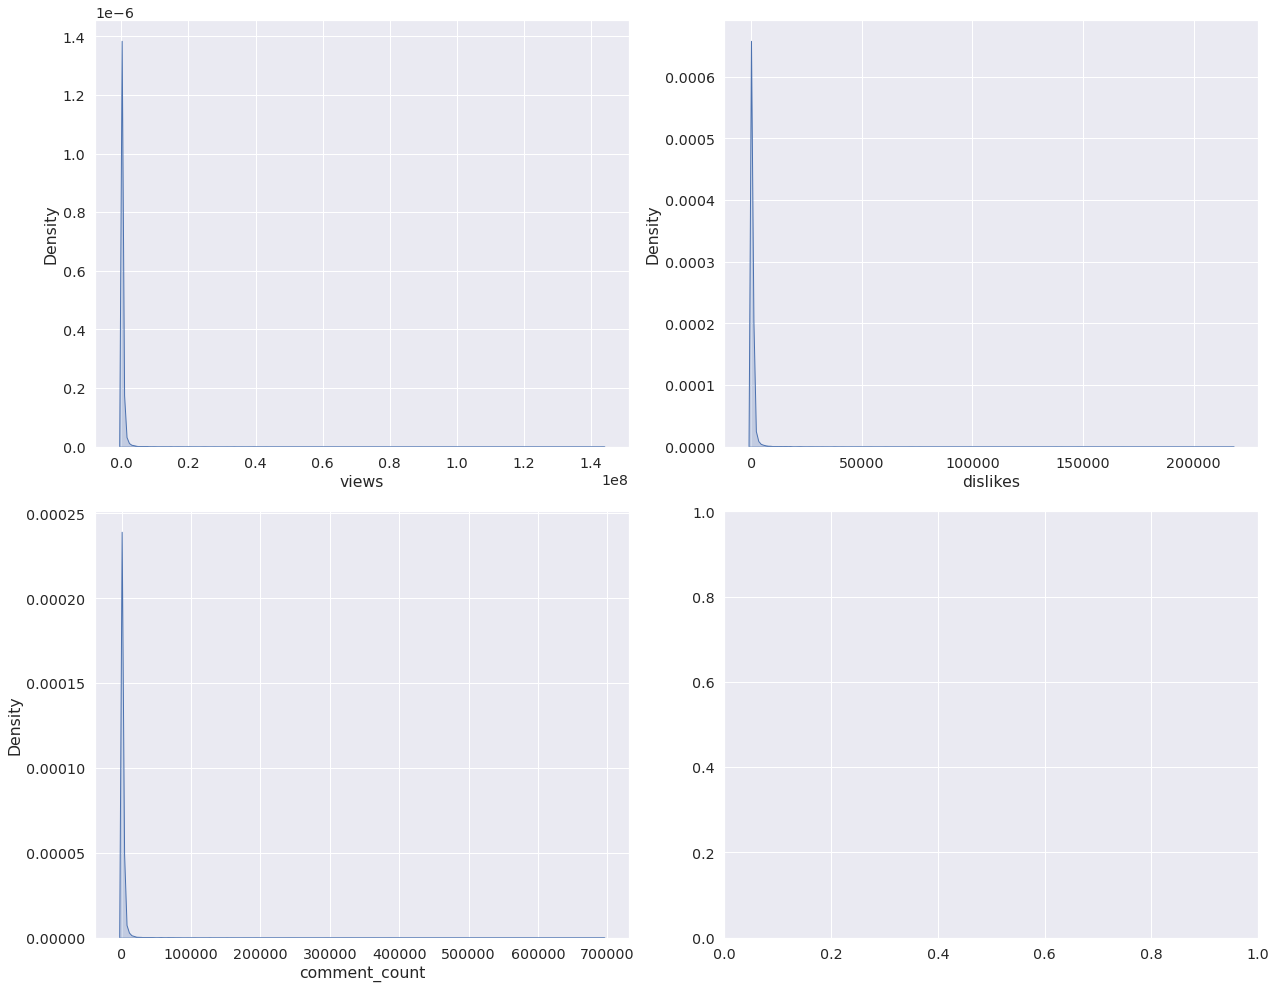

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

**Log Transformation of Numerical Columns**

In [ ]:
for c in num_cols + ['likes']:
  train[c] = np.log1p(train[c]) 

**Boxplots**

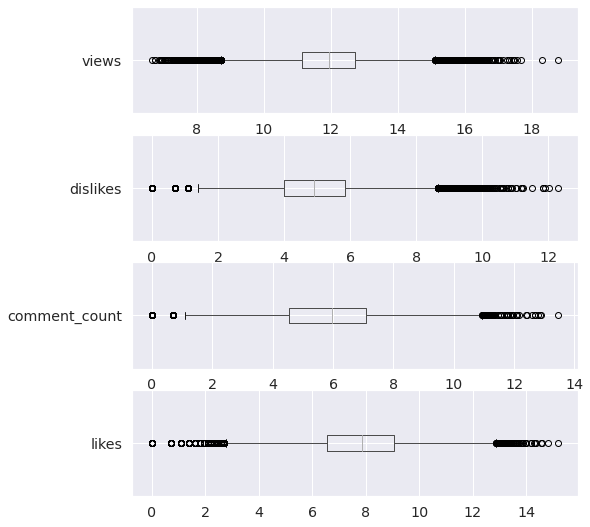

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_cols + ['likes']):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

**Density Plots**

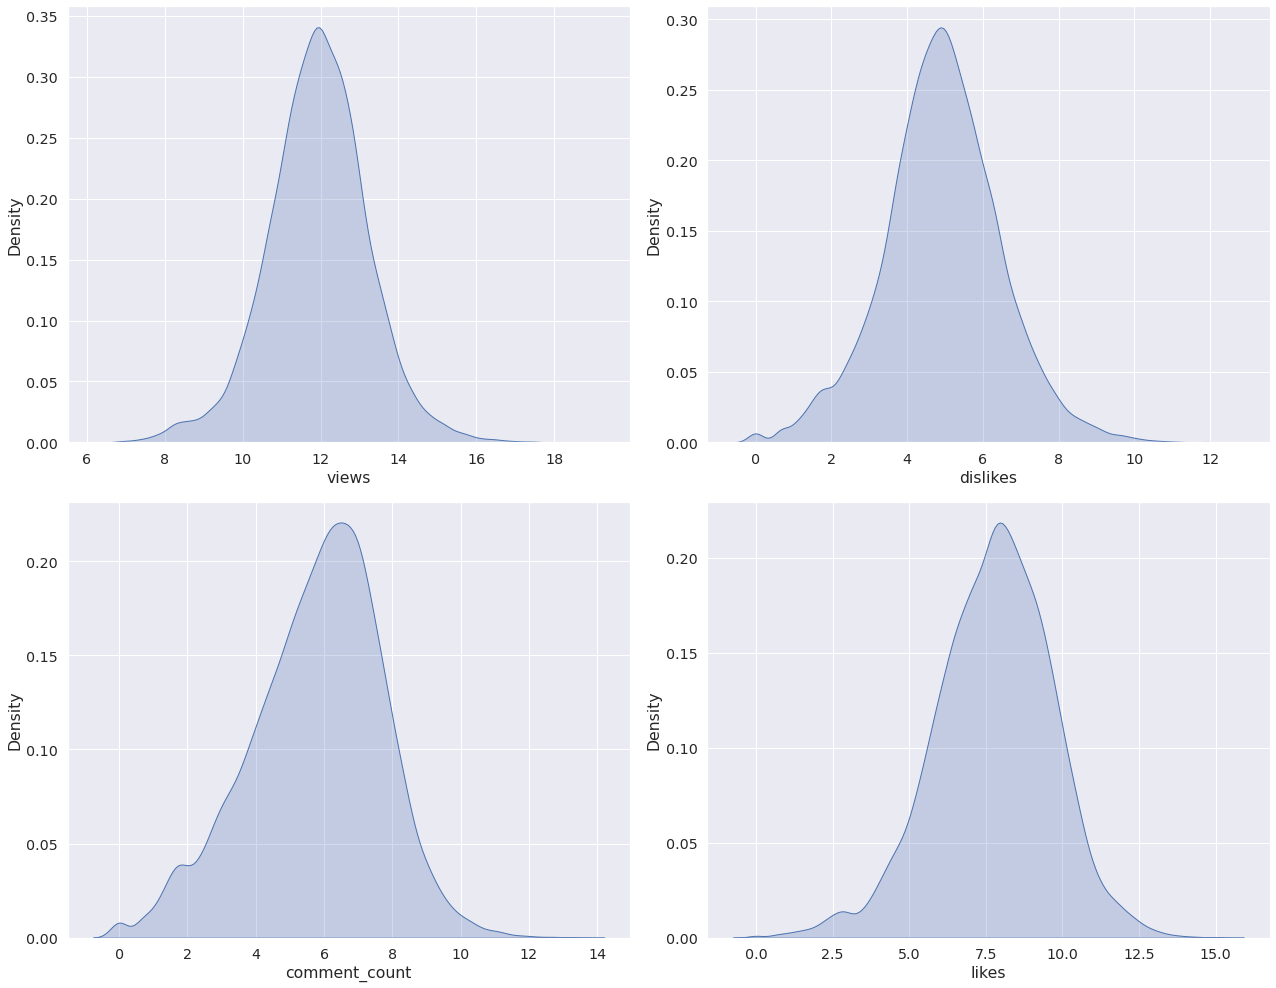

In [ ]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols + ['likes']):
  plot = sns.kdeplot(data=train, x=c, ax=axes[i], fill=True)
plt.tight_layout()

#### **Bivariate Analysis**

##### **Correlation HeatMaps**

<Figure size 1008x576 with 0 Axes>

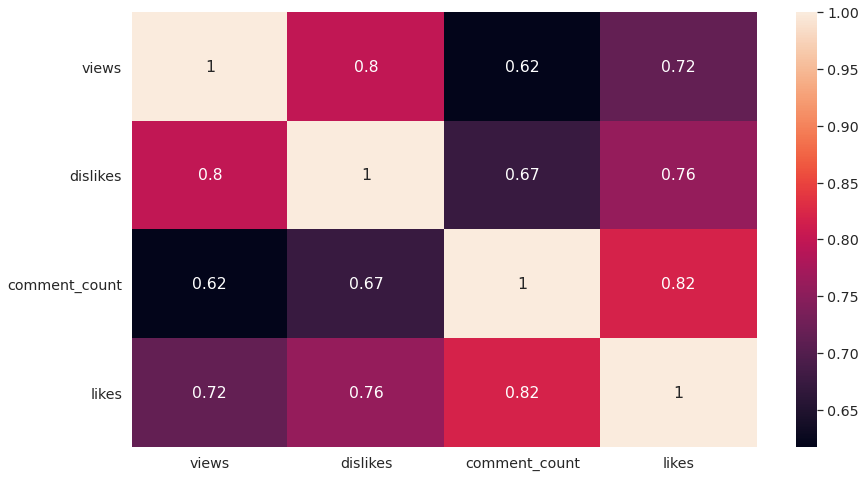

In [ ]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols + ['likes']].corr(), annot=True)

##### **Pair Plots**

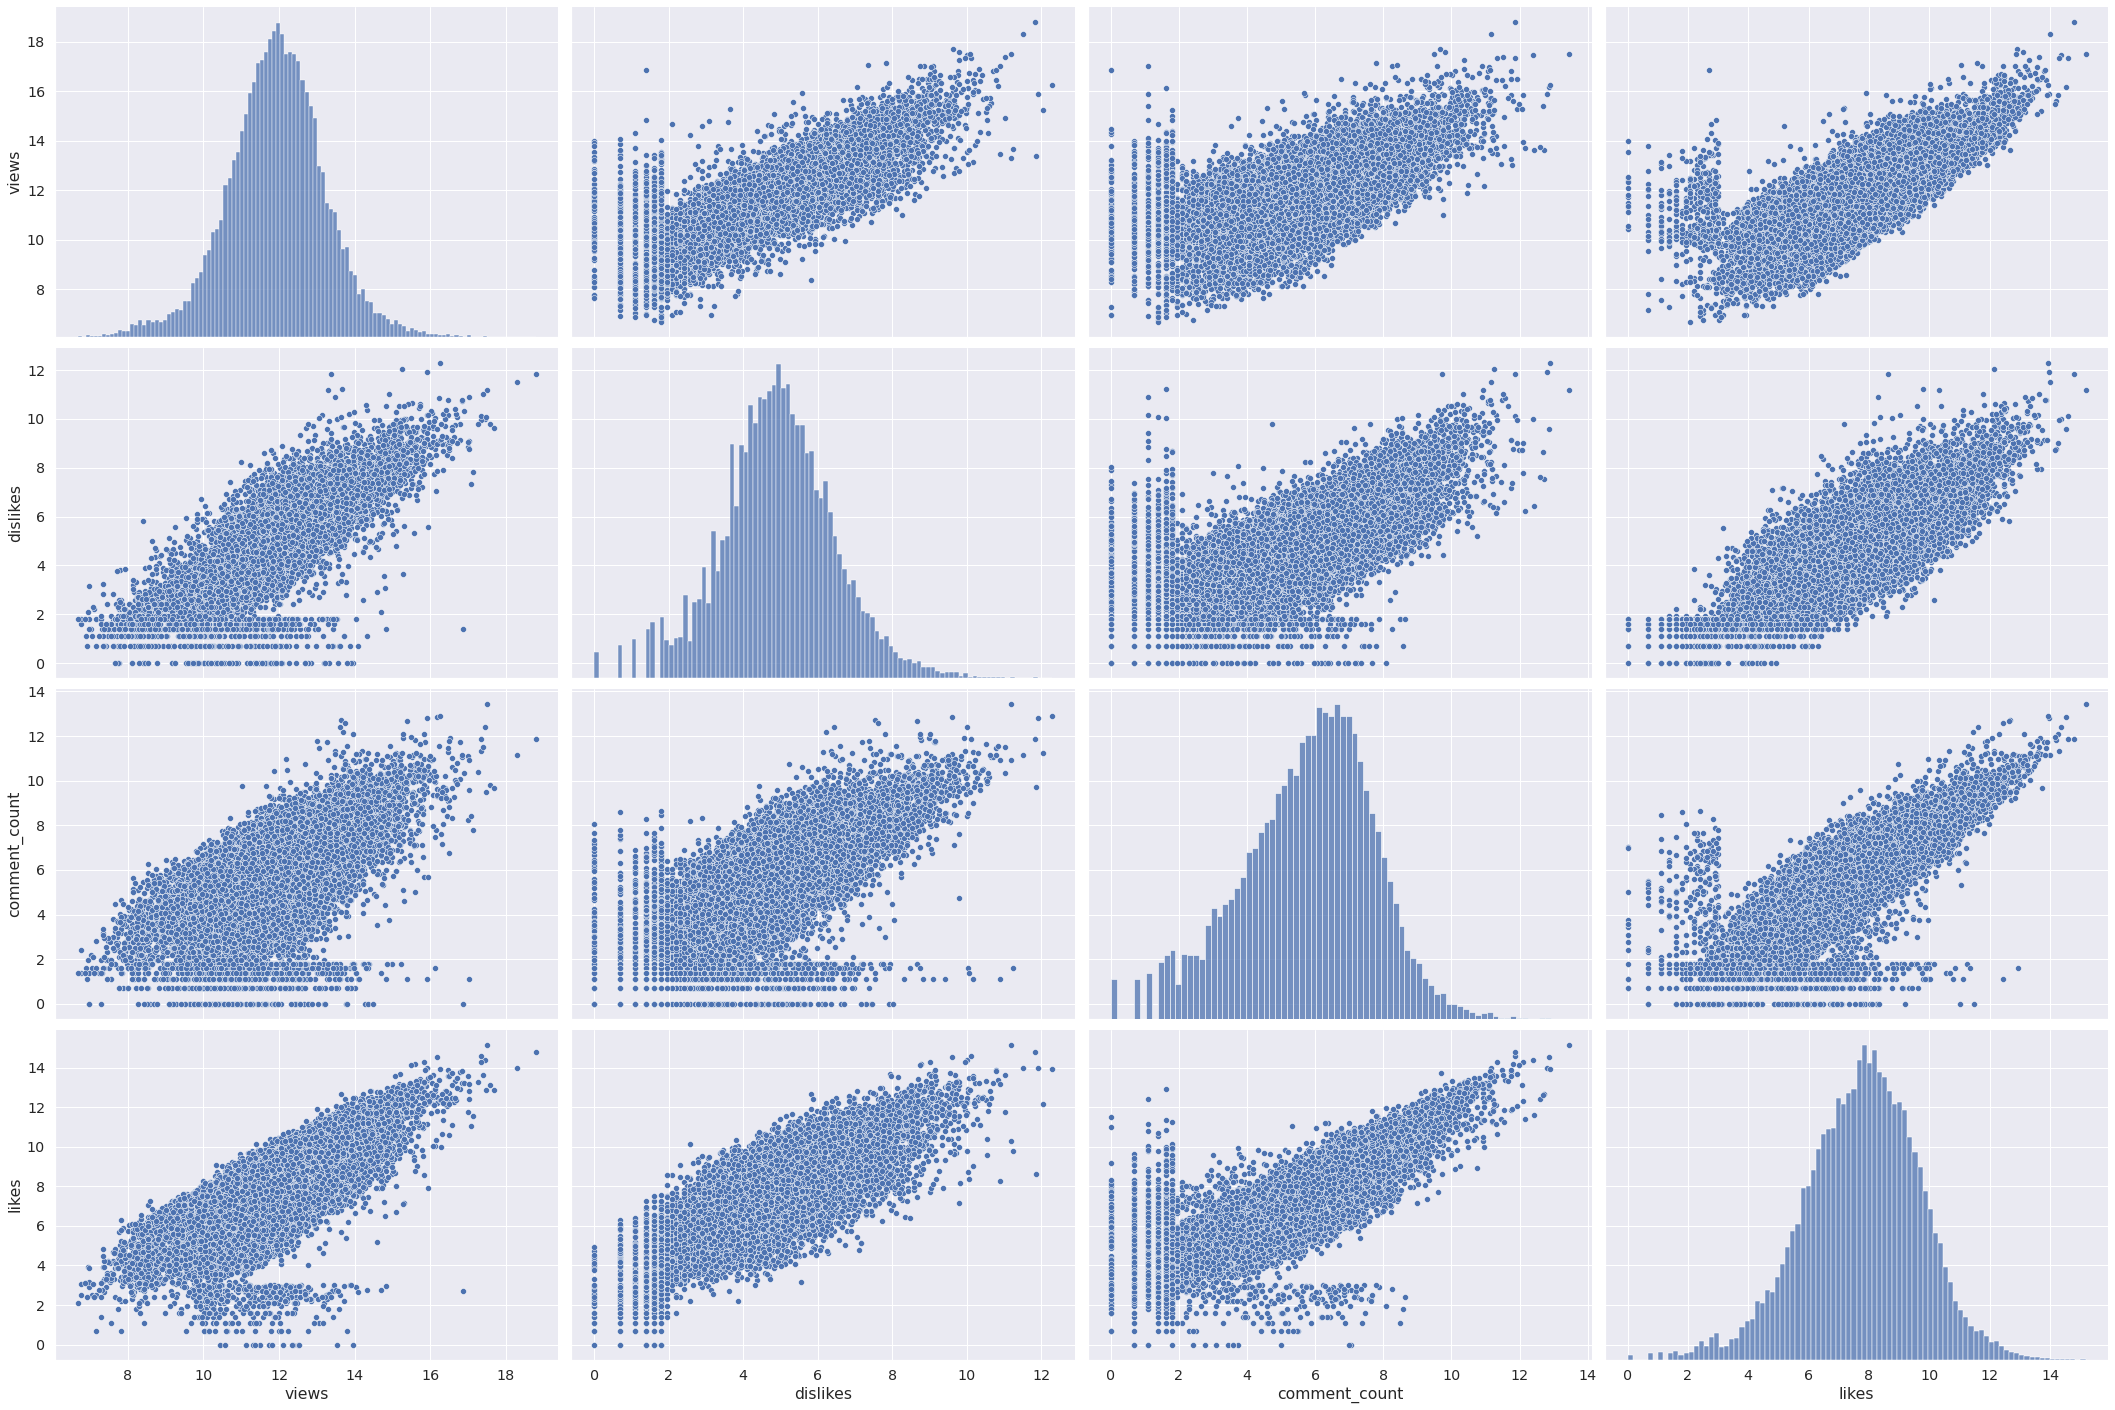

In [ ]:
_ = sns.pairplot(train[num_cols + ['likes']], height=5, aspect=24/16)

**Answering Hypothesis**

* **Do videos with more views get more likes** ?

Yes they do, we have a high correlation of 0.72 also the plot between the two variables shows this.

* **Do videos with more comments get more likes** ?

Yes they do, we have a high correlation of 0.82 also the plot between the two variables shows this.

* **Do videos with more dislikes get less likes** ?

Any form of popularity is good popularity. As the number dislikes increases, number of views increases too, and so the number of likes.

* **Do longer videos get more likes than shorter videos ?**

We don't have data to answer this question. Should we try to collect more data ? What other features could be helpful ?


### **Categorical Variables**

#### **Univariate Analysis**

##### **Pie Charts**

In [ ]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [ ]:
train['channel_title'].nunique()

5764

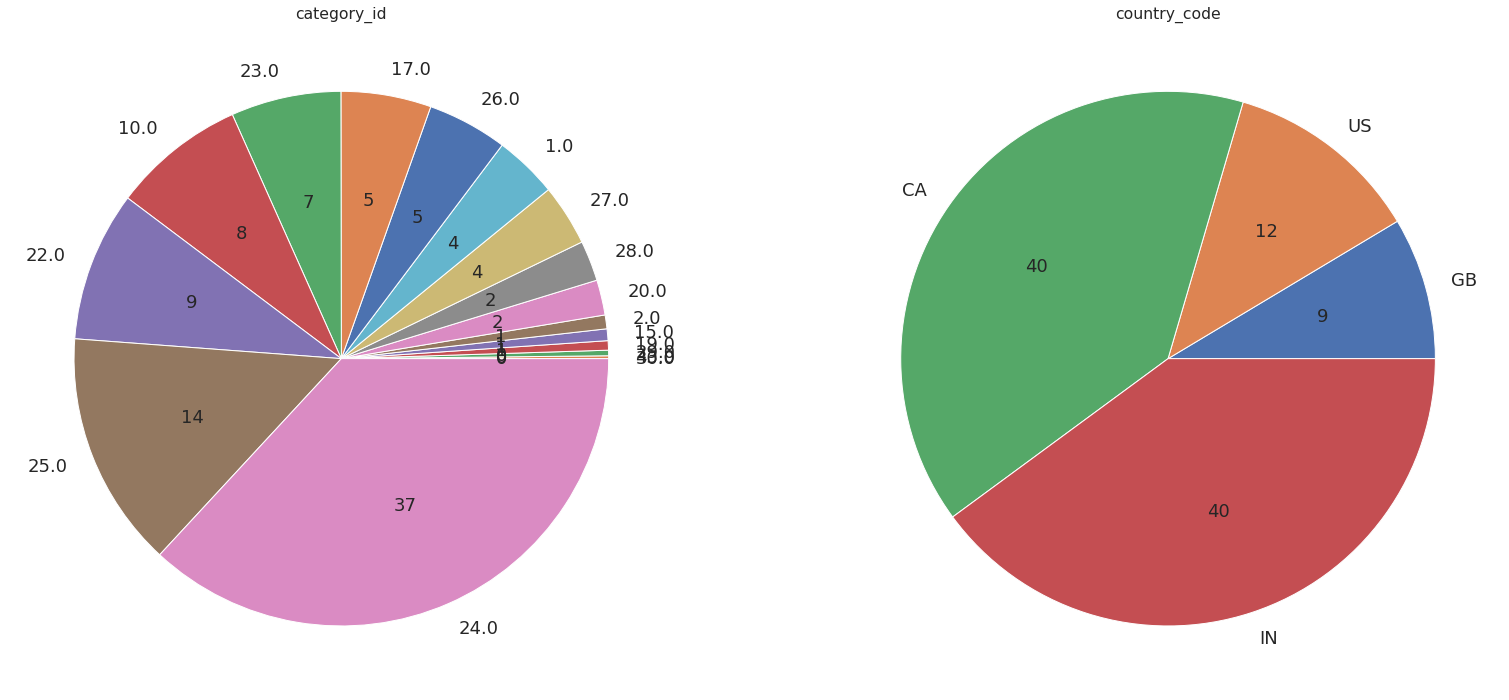

In [ ]:
cat_cols = ['category_id', 'country_code', 'channel_title']
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

for i, c in enumerate(['category_id', 'country_code']):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=18)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

**Horizontal Bar Plots**

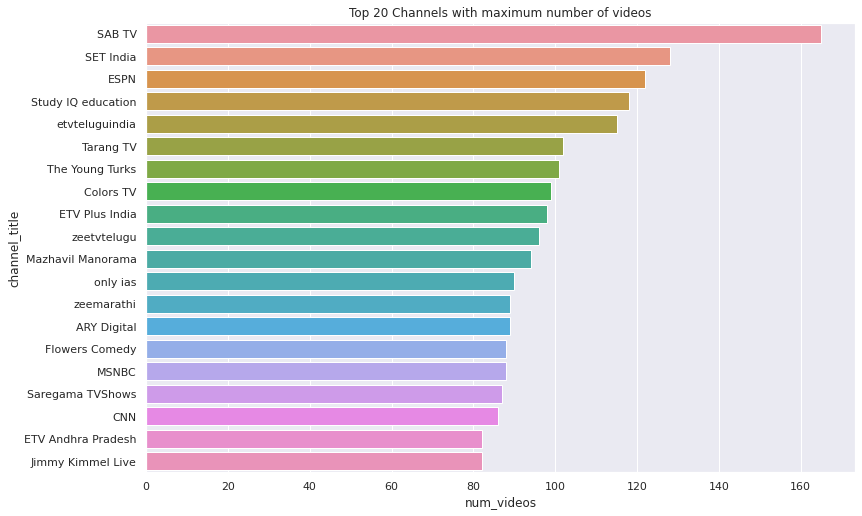

In [ ]:
sns.set(rc={'figure.figsize':(12.7, 8.27)})

top_20_channels = train['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns = ['channel_title', 'num_videos']

_ = sns.barplot(data = top_20_channels, y = 'channel_title', x = 'num_videos')
_ = plt.title("Top 20 Channels with maximum number of videos")

#### **Bivariate Analyis**

**Country Wise Number of Videos for Channel**

In [ ]:
country_wise_channels = train.groupby(['country_code', 'channel_title']).size().reset_index()
country_wise_channels.columns = ['country_code', 'channel_title', 'num_videos']
country_wise_channels = country_wise_channels.sort_values(by = 'num_videos', ascending=False)

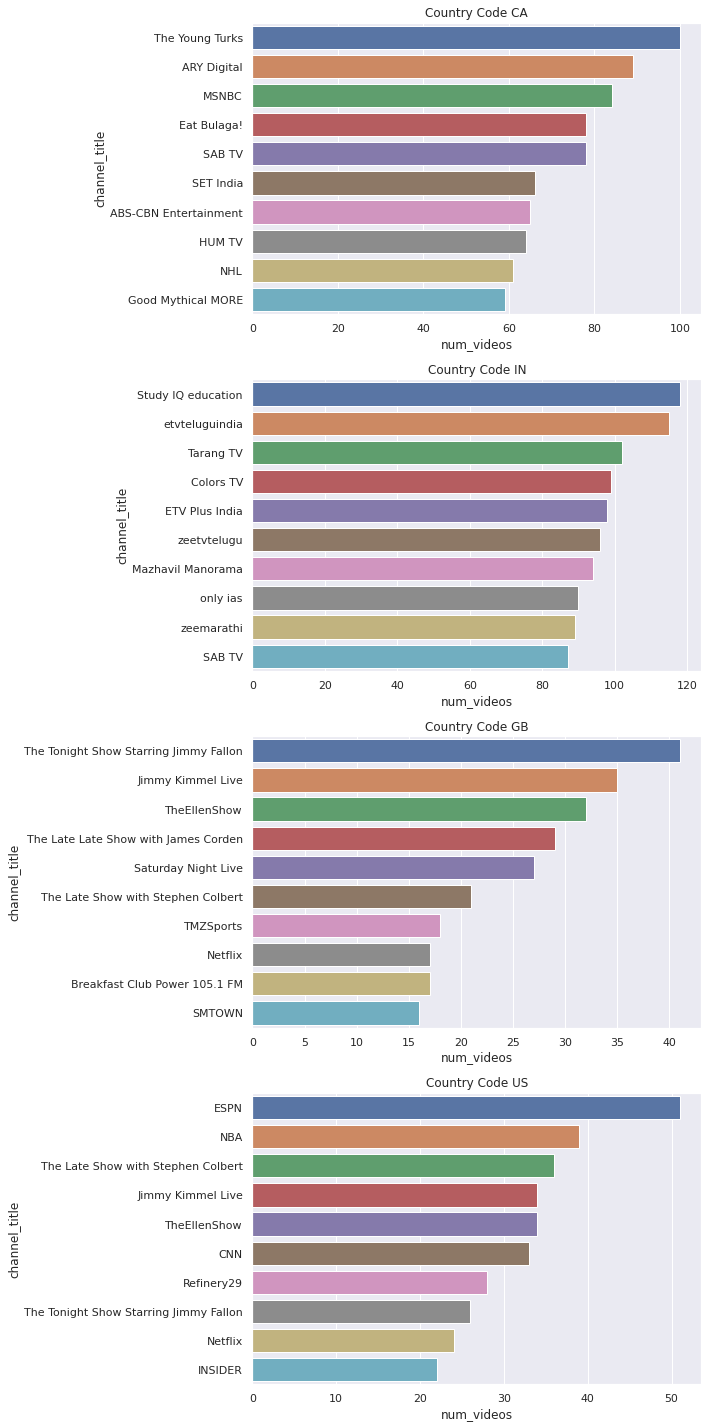

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'num_videos', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

#### **Multivariate Analysis**

Analyzing more than two variables at once

**Country Wise Likes for Channel**

What are the variables that we want to analyze here ?

In [ ]:
country_wise_channels = train.groupby(['country_code', 'channel_title'])['likes'].max().reset_index()
country_wise_channels = country_wise_channels.sort_values(by = ['likes'], ascending=False)

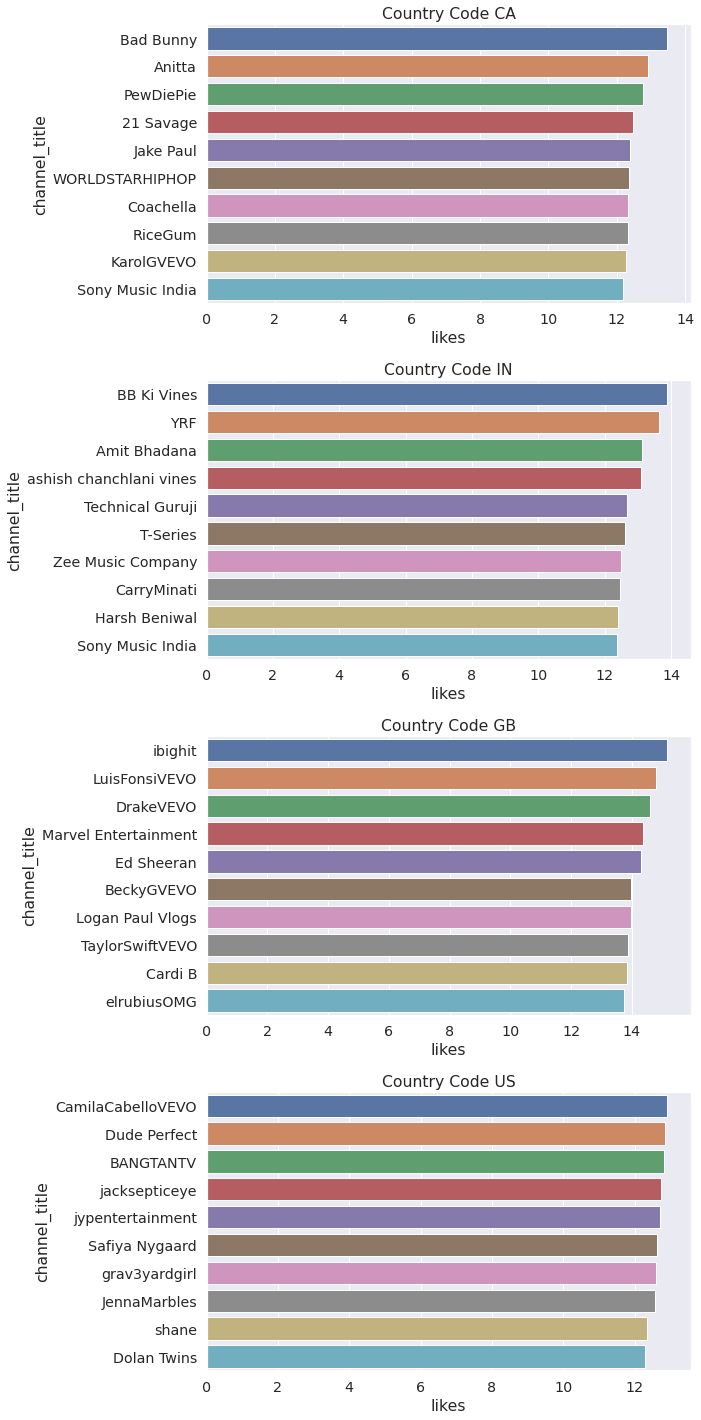

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

for i, c in enumerate(train['country_code'].unique()):
  country = country_wise_channels[country_wise_channels['country_code'] == c][:10]
  _ = sns.barplot(x = 'likes', y = 'channel_title', data = country, ax = axes[i])
  _ = axes[i].set_title(f'Country Code {c}')

plt.tight_layout()

**Question** 

* **Does a channel affect the number of likes?**

##### **CatPlots**

**Likes Distribution Per Category**

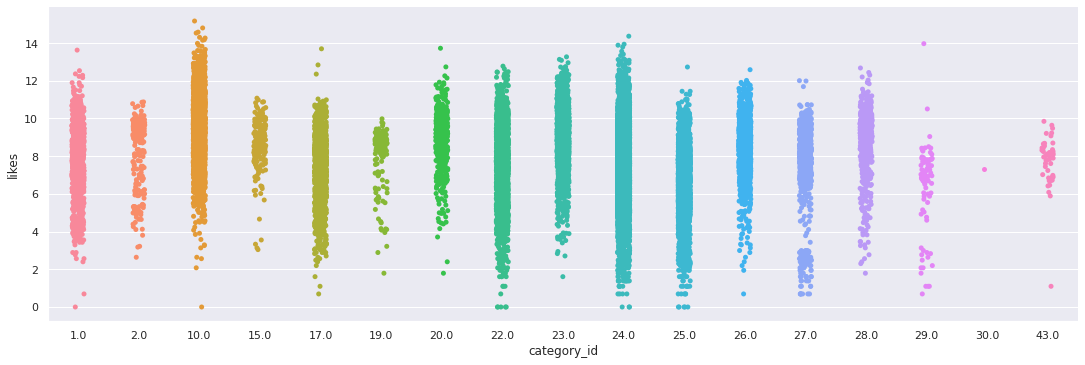

In [ ]:
_ = sns.catplot(x="category_id", y="likes", data=train, height=5, aspect=24/8)

**Likes Distribution Per Country**

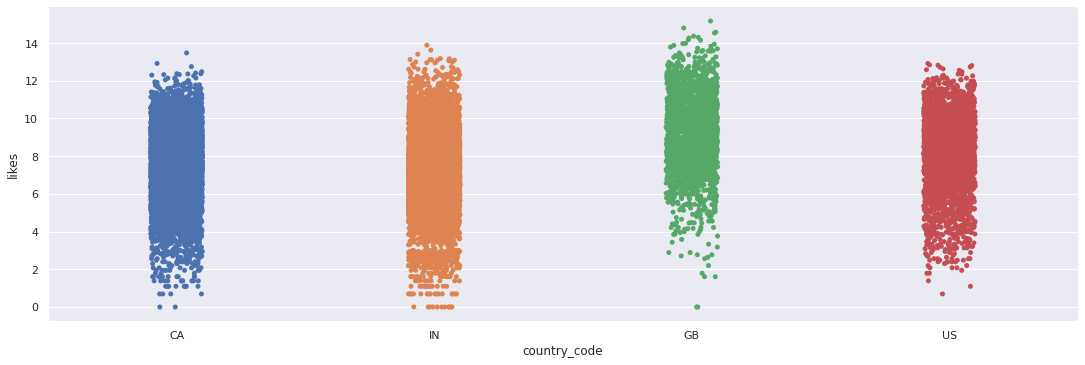

In [ ]:
_ = sns.catplot(x="country_code", y="likes", data=train, height=5, aspect=24/8)

**Mean Likes Per Country**

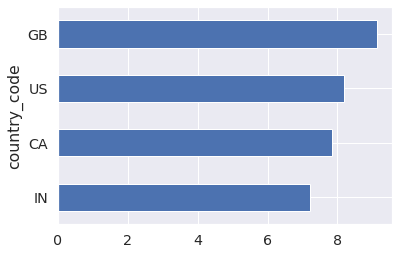

In [ ]:
_ = train.groupby('country_code')['likes'].mean().sort_values().plot(kind = 'barh')

**Question** 

* **Does a country affect the number of likes?**

Looks like videos posted in England have an higher average number of likes compared to videos posted in India.

### **DateTime Variables**

In [ ]:
train['publish_date'] = pd.to_datetime(train['publish_date'], format='%Y-%m-%d')
test['publish_date'] = pd.to_datetime(test['publish_date'], format='%Y-%m-%d')
train['publish_date']

0       2017-12-12
1       2018-03-08
2       2018-03-26
3       2018-02-21
4       2018-05-10
           ...    
26056   2018-01-16
26057   2017-12-17
26058   2018-03-04
26059   2018-05-17
26060   2018-01-16
Name: publish_date, Length: 26061, dtype: datetime64[ns]

**Value Counts of Videos Year Wise**

**Mininum and Maximum Date**

In [ ]:
train['publish_date'].min(), train['publish_date'].max()

(Timestamp('2006-07-23 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In [ ]:
train['publish_date'].dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

**Number of Videos in Data datewise**

In [ ]:
latest_data_train = train[train['publish_date'] > '2017']
latest_data_test = test[test['publish_date'] > '2017']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().plot(figsize=(18, 6))

In [ ]:
test.shape, train.shape

((11170, 11), (26061, 12))

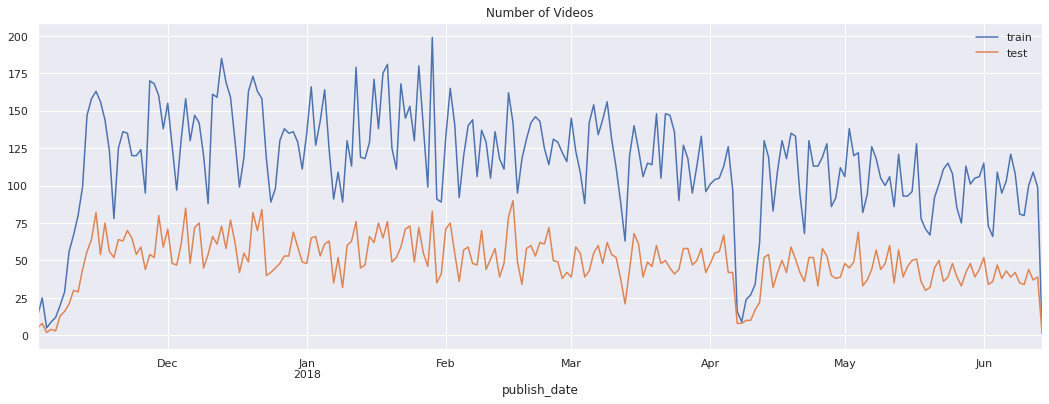

In [ ]:
latest_data_train = train[train['publish_date'] > '2017-11']
latest_data_test = test[test['publish_date'] > '2017-11']
_ = latest_data_train.sort_values(by = 'publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18, 6), title = 'Number of Videos')
_ = latest_data_test.sort_values(by = 'publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18, 6), title = 'Number of Videos')
_ = plt.legend()

**Mean Likes in Data Sorted by Date**

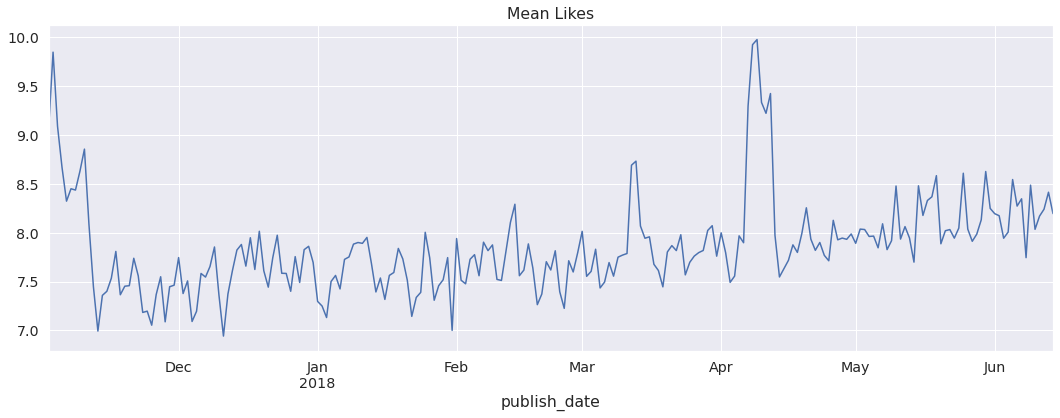

In [ ]:
latest_data = train[train['publish_date'] > '2017-11']
_ = latest_data.sort_values(by = 'publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18, 6), title="Mean Likes")

**Number of Videos by Country**

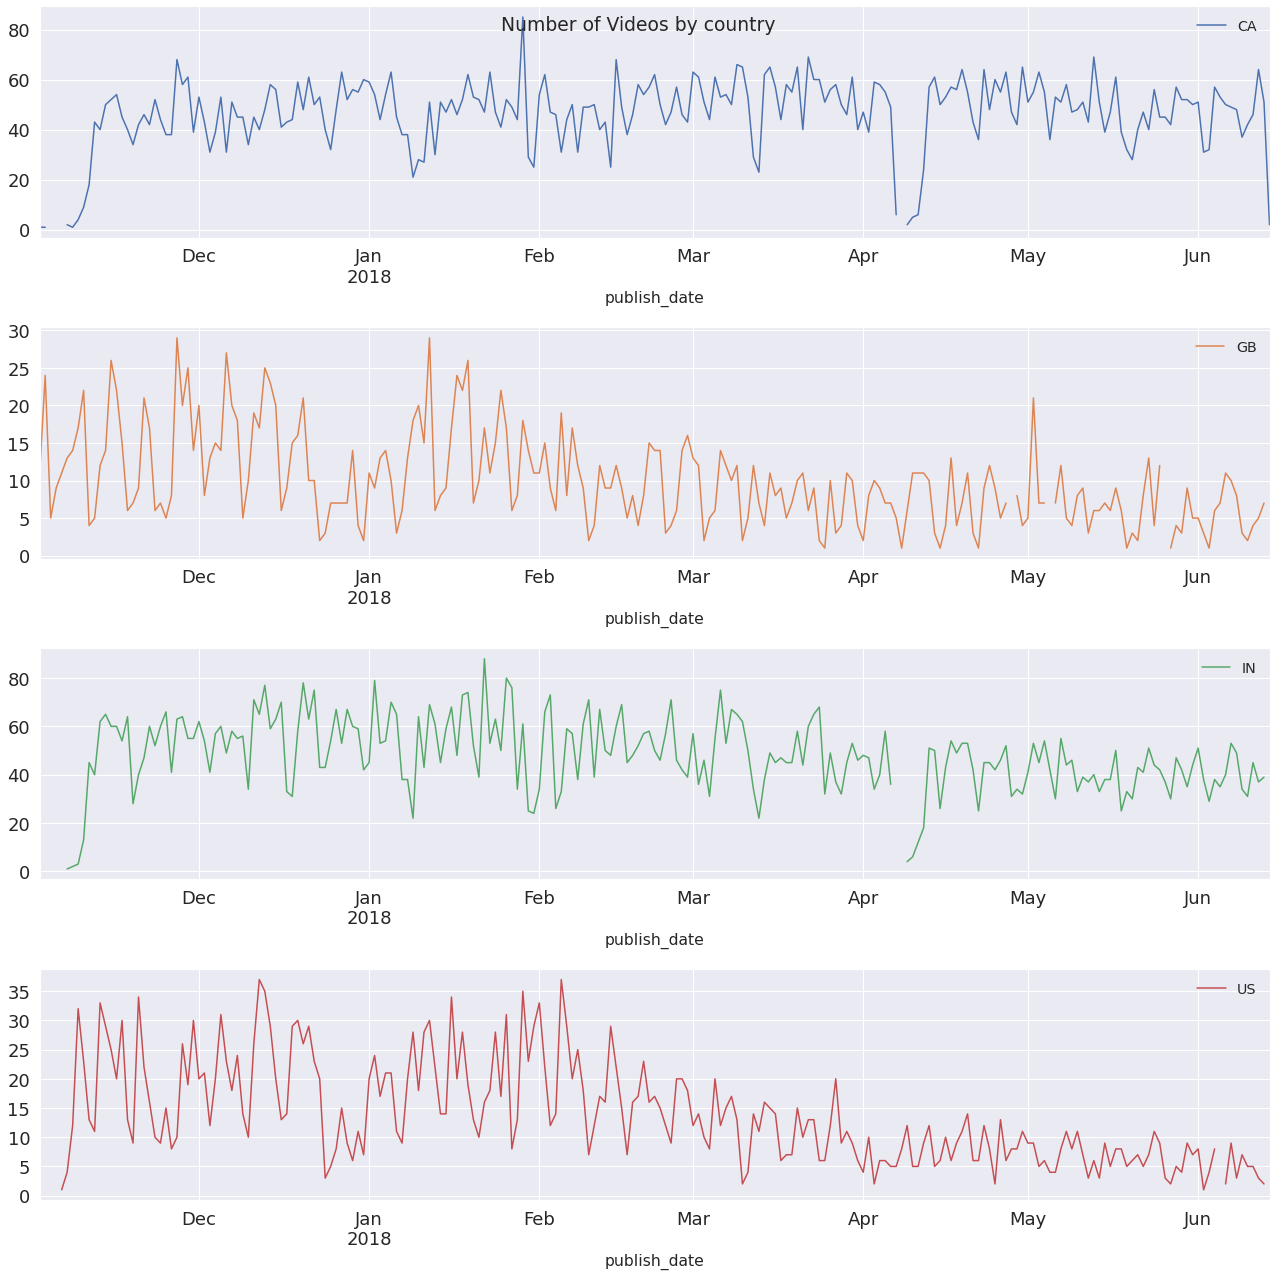

In [ ]:
tmp = latest_data.groupby(['publish_date', 'country_code']).size().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values=0).plot(subplots=True, figsize=(18, 18),
                                                                                           title='Number of Videos by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

**Why could be the reason for drop in Number of Videos for GB and USA ?**

**Mean Number of Likes by Country sorted by Date**

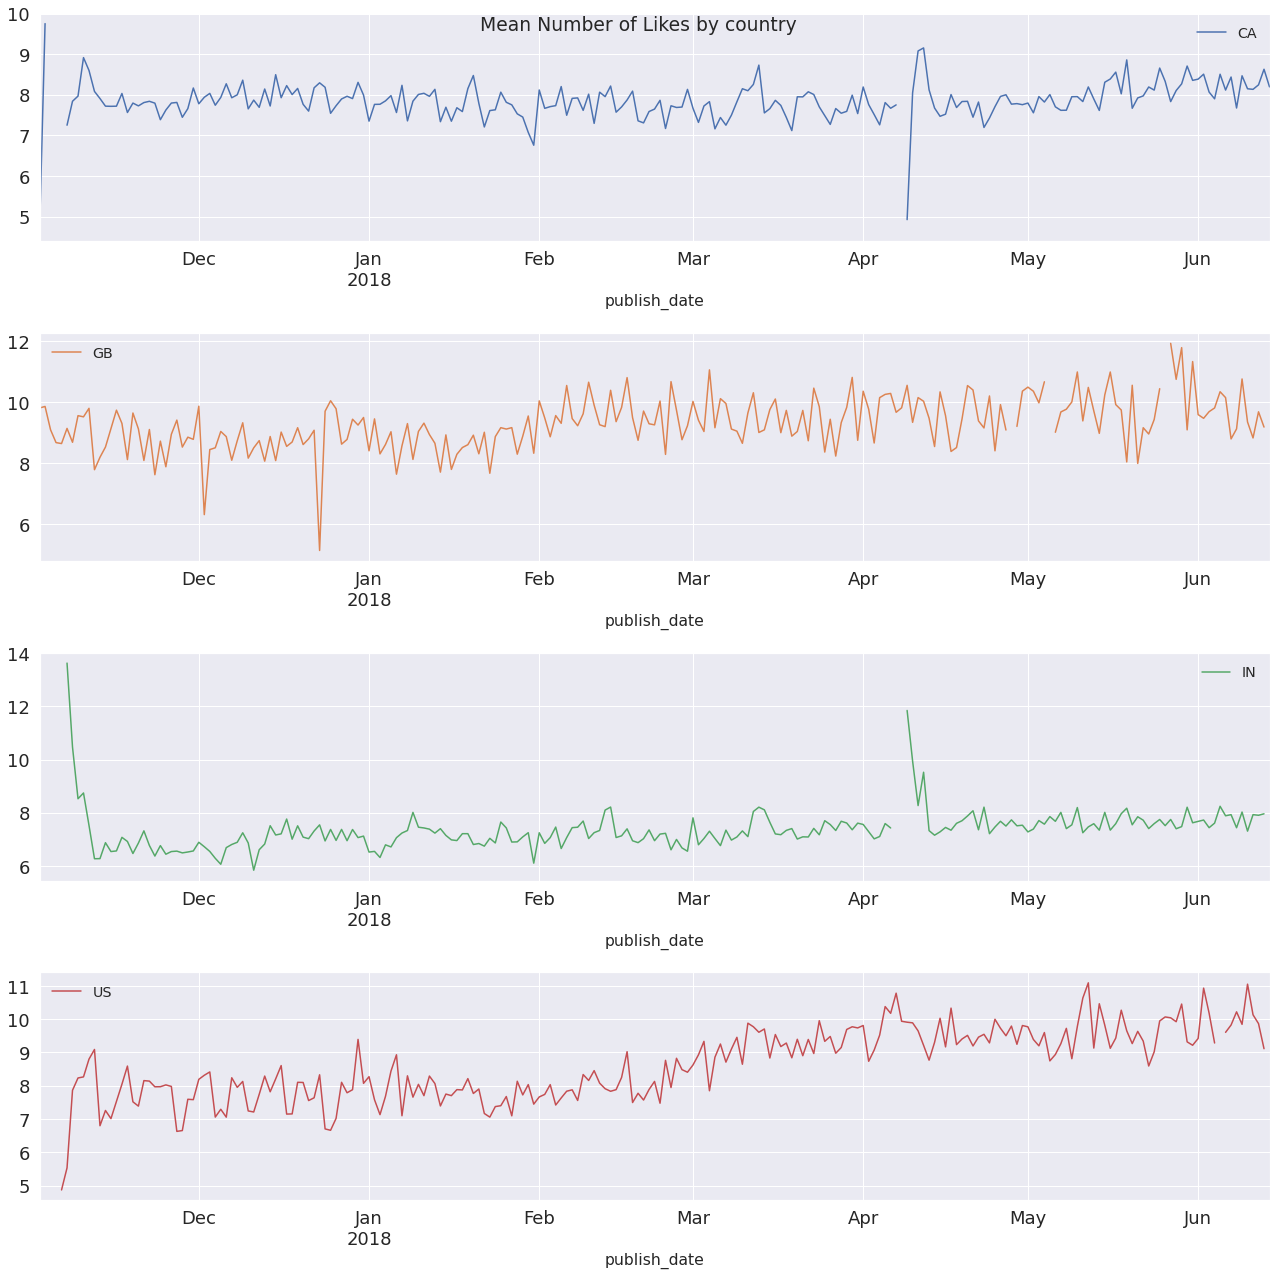

In [ ]:
tmp = latest_data.groupby(['publish_date', 'country_code'])['likes'].mean().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values='likes').plot(subplots=True, figsize=(18, 18),
                                                                                           title='Mean Number of Likes by country',
                                                                                           sharex=False,
                                                                                           fontsize=18)
plt.tight_layout()

**Do people post more videos on weekends than weekdays ?**

In [ ]:
train['dayofweek'] = train['publish_date'].dt.dayofweek

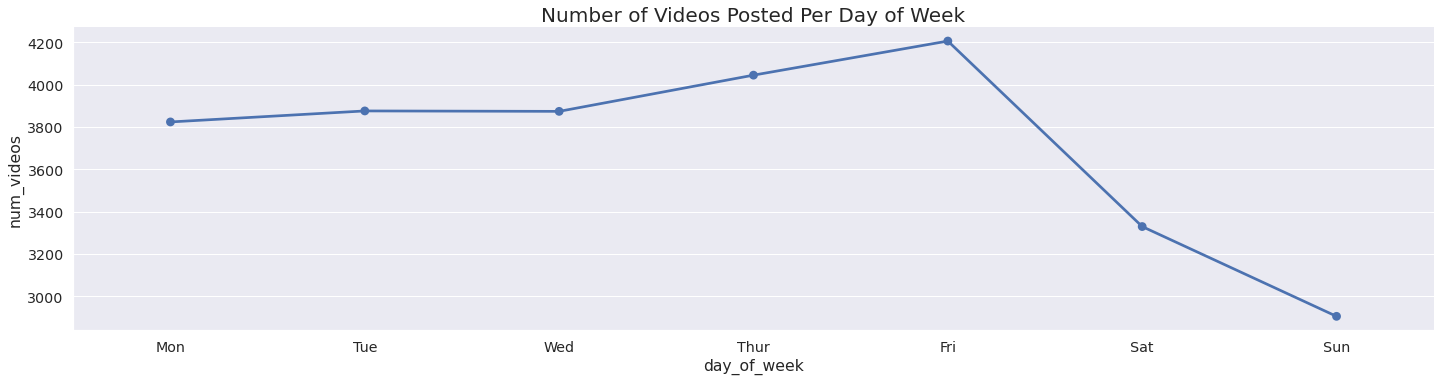

In [ ]:
n_videos_per_day_of_week = train['dayofweek'].value_counts().sort_index().reset_index()
n_videos_per_day_of_week.columns = ['day_of_week', 'num_videos']
n_videos_per_day_of_week['day_of_week'] = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
_ = sns.catplot(x = 'day_of_week', y = 'num_videos', data = n_videos_per_day_of_week, kind = 'point',aspect = 24/6)
_ = plt.title("Number of Videos Posted Per Day of Week", fontsize=20)

It looks our hypothesis is incorrect in context of the current data. Most of the videos were published on Friday, but Saturday and Sunday saw the least number of videos published

### **Textual Data**

In [ ]:
text_cols = ['title', 'tags', 'description']

#### **Word Clouds**

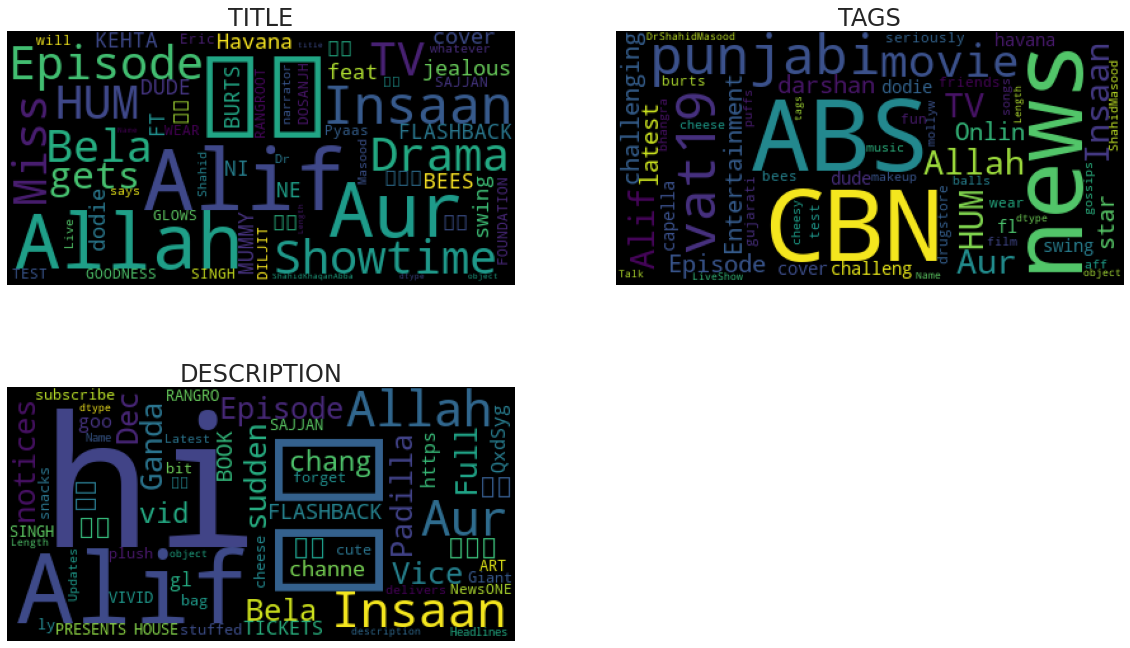

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_cols):
  op = wc.generate(str(train[c]))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(c.upper(), fontsize=24)
  _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [ ]:
train['likes'].describe()

count    26061.000000
mean         7.739954
std          1.927899
min          0.000000
25%          6.527958
50%          7.840706
75%          9.054154
max         15.171369
Name: likes, dtype: float64

In [ ]:
100 * ((train['likes'] > 10).sum()/train.shape[0])

10.694140669966616

In [ ]:
def plot_countrywise(country_code = 'IN'):
  country = train[train['country_code'] == country_code]
  country = country[country['likes'] > 10]
  fig, axes = plt.subplots(2, 2, figsize=(20, 12))
  axes = [ax for axes_row in axes for ax in axes_row]

  for i, c in enumerate(text_cols):
    op = wc.generate(str(country[c]))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(c.upper(), fontsize=24)
    _ = axes[i].axis('off')

  fig.delaxes(axes[3])
  _ = plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

**US HIGHLY LIKED YOUTUBE VIDEOS TOP WORDS**

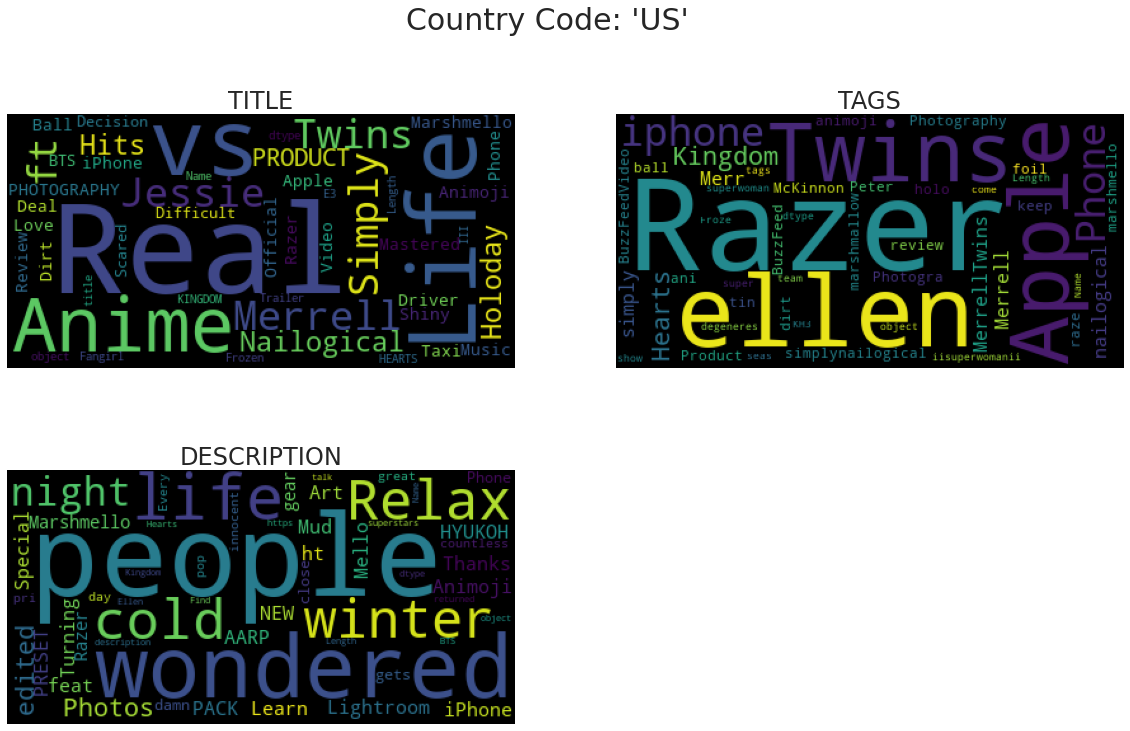

In [ ]:
plot_countrywise("US")

**GREAT BRITAIN YOUTUBE VIDEOS TOP WORDS**

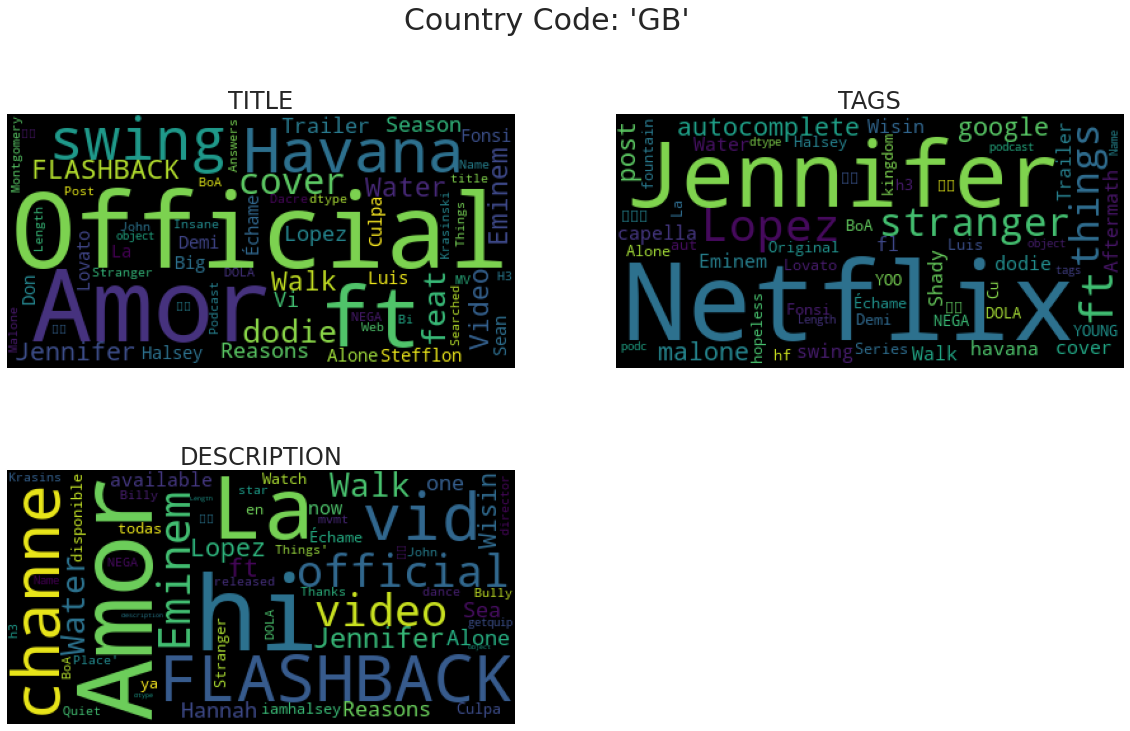

In [ ]:
plot_countrywise("GB")

**Exercise**

Analyze **Indian** and **Canadian** Videos

**Do descriptive videos get more number of likes ?**

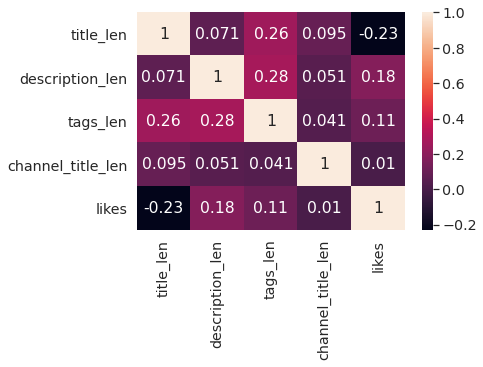

In [ ]:
train['title_len'] = train['title'].apply(lambda x: len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))

_  = sns.heatmap(train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

So if you keep your title length short and description long, you are having higher chances of getting likes.

# **Baseline Model(s)**

## **METRIC**

**RMSLE(Root Mean Squared Log Error)**

Simply put RMSLE is the Root Mean Squared Error of the logarithm of actual and predicted values.


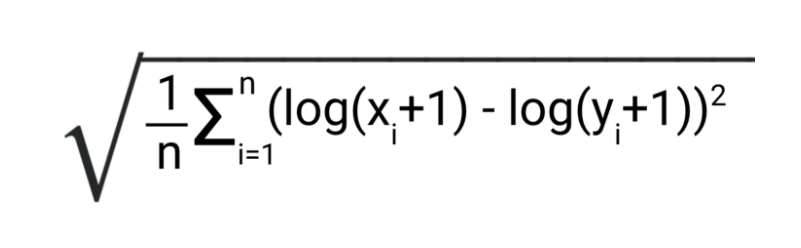

The Robustness of RMSLE to the outliers, the property of calculating the relative error between the Predicted and Actual Values, the most unique property of the RMLSE that it penalizes the underestimation of the actual value more severely than it does for the Overestimation.



**Read More about RMSLE here**

https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-

**Helper Function to Download Test Predictions as CSV**

In [ ]:
ss.head()

video_id  likes
0     87185      0
1      9431      0
2     40599      0
3       494      0
4     73942      0

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COL] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train[num_cols + ['likes']] = train[num_cols + ['likes']].apply(lambda x: np.log1p(x))
test[num_cols] = test[num_cols].apply(lambda x: np.log1p(x))

## **Model A. (Predicting all instances as mean)**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

def rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred):
  return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

target = train[TARGET_COL]

In [ ]:
preds_target = pd.Series([target.mean()] * len(train))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1927.8618309979083


In [ ]:
np.log1p(10)

2.3978952727983707

In [ ]:
np.expm1(2.3978952727983707)

10.000000000000002

In [ ]:
preds_test = pd.Series([target.mean()] * len(test))
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_mean_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pd.read_csv('hacklive2_mean_preds.csv')

video_id       likes
0         87185  2297.36779
1          9431  2297.36779
2         40599  2297.36779
3           494  2297.36779
4         73942  2297.36779
...         ...         ...
11165     19415  2297.36779
11166     25168  2297.36779
11167     80293  2297.36779
11168     80880  2297.36779
11169      6514  2297.36779

[11170 rows x 2 columns]

## **Model B. (Predicting all instances as median)**

In [ ]:
preds_target = pd.Series([target.median()] * len(train))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1930.4927341163989


In [ ]:
preds_test = pd.Series([target.median()] * len(test))
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_median_preds.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model C. (Predicting using number of views)**

In [ ]:
likes_per_view = ((train['likes'] + 1)/(train['views'] + 1))
likes_per_view.mean()

0.6723608458619709

In [ ]:
preds_target = train['views'] * 0.677

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1473.9157749667168


In [ ]:
preds_test = test['views'] * 0.672
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_views.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model D. (Predicting using number of comments)**



In [ ]:
likes_per_comment = (train['likes'] + 1)/(train['comment_count'] + 1)
likes_per_comment.mean()

1.370729312306306

In [ ]:
preds_target = train['comment_count'] * 1.37

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1549.204914717152


In [ ]:
preds_test = test['comment_count'] * 1.37
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_num_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Model E. (Predicting using Dislikes)**



In [ ]:
likes_per_dislike = (train['likes'] + 1)/(train['dislikes']+1)
likes_per_dislike.mean()

1.523152073084116

In [ ]:
preds_target = train['dislikes'] * 1.52

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1550.5421251222745


In [ ]:
preds_test = test['dislikes'] * 1.52
preds_test = np.expm1(preds_test)
download_preds(preds_test, 'hacklive2_preds_using_dislikes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>